In [2]:
import pandas as pd
#importando o banco de dados
db_inicial = '/content/bd_modelado.xlsx'
sheet_name = 'a'
df = pd.read_excel(db_inicial, sheet_name=sheet_name)
df.head()

,CIE,Fornecedor,nota
0,31264,INDÚSTRIA E COMÉRCIO ELETRO ELETRÔNICA GEHAKA ...,0.0
1,20901,PROVISÃO JC COMÉRCIO DE ELETRO ELETRÔNICOS LTDA -,5.0
2,20901,PROVISÃO JC COMÉRCIO DE ELETRO ELETRÔNICOS LTDA -,5.0
3,31636,MARIA IGNEZ SCROCCA ELETROELETRONICOS ME,0.0
4,30892,PROVISÃO JC COMÉRCIO DE ELETRO ELETRÔNICOS LTDA -,0.0


In [3]:
##checando a quantidade de nulos
null_count = df.isnull().sum()
print(null_count)

CIE            4176
Fornecedor    60579
nota           4174
dtype: int64


In [4]:
#dropando os nulos
df = df.dropna(axis=0)

In [6]:
#checando se foram dropados corretamente
null_count = df.isnull().sum()
print(null_count)

CIE           0
Fornecedor    0
nota          0
dtype: int64


In [14]:
#código necessário para checar se a matriz que relaciona cada escola com cada fornecedor está funcionndo
media_notas = df.groupby(['CIE', 'Fornecedor'])['nota'].mean().reset_index()


fornecedores = media_notas['Fornecedor'].unique()
escolas = media_notas['CIE'].unique()
matriz = pd.DataFrame(index=escolas, columns=fornecedores)

for _, row in media_notas.iterrows():
    matriz.at[row['CIE'], row['Fornecedor']] = row['nota']

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

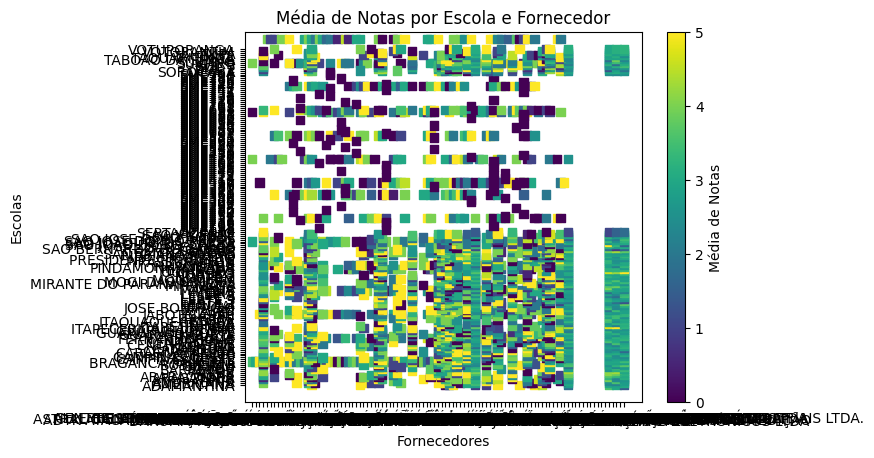

In [17]:
#visualização com o intuíto para checar se está funcionando
import matplotlib.pyplot as plt

escolas = matriz.index
fornecedores = matriz.columns

for escola in escolas:
    plt.scatter(fornecedores, [escola] * len(fornecedores), c=matriz.loc[escola], cmap='viridis', marker='s')

plt.colorbar(label='Média de Notas')
plt.xlabel('Fornecedores')
plt.ylabel('Escolas')
plt.title('Média de Notas por Escola e Fornecedor')
plt.show()

In [18]:
##exportando isso para um arquivo excel para trabalhar facilmente
df_matrizinha = pd.DataFrame(matriz)
caminho_excel = "matriz_de_notas.xlsx"
df_matrizinha.to_excel(caminho_excel, index=True)
print(f"A matriz de notas foi exportada para o arquivo Excel: {caminho_excel}")

A matriz de notas foi exportada para o arquivo Excel: matriz_de_notas.xlsx
